In [17]:
14

14

In [2]:
# !wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub

import tokenization

In [4]:
def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [6]:
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1"
bert_layer = hub.KerasLayer(module_url, trainable=False)

vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [7]:
import sklearn
import pandas as pd
import numpy as np
from gensim.models import KeyedVectors

from tensorflow import keras
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.regularizers import l2

In [8]:
COMMENT = 'comment_text'
LABELS = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [9]:
base_path = 'jigsaw-toxic-comment-classification-challenge'
train = pd.read_csv(f'{base_path}/train.csv')
test = pd.read_csv(f'{base_path}/test.csv')
submission = pd.read_csv(f'{base_path}/sample_submission.csv')
test_labels = pd.read_csv(f'{base_path}/test_labels.csv')

In [10]:
train_input = bert_encode(train[COMMENT].values, tokenizer, max_len=100)
test_input = bert_encode(test[COMMENT].values, tokenizer, max_len=100)

In [11]:
train_output = train[LABELS].values

# Problem understanding

# Dataset generation

# Metrics define

# Validation strategy

# Data processing (extract useful information)

In [12]:
def build_model(bert_layer, max_len=512):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    _, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :]
    out = Dense(len(LABELS), activation='sigmoid')(clf_output)
    
    model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(Adam(lr=3e-4), loss='binary_crossentropy', metrics=['acc'])

    return model

In [13]:
model = build_model(bert_layer, max_len=100)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 100)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 100)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 1024), (None 335141889   input_word_ids[0][0]             
                                                                 input_mask[0][0]      

In [14]:
checkpoint = ModelCheckpoint('bert_model.h5', monitor='val_loss', save_best_only=True)
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=1,  verbose=1)

In [ ]:
hist = model.fit(
    train_input, 
    train_output,
    validation_split=0.05,
    epochs=100,
    shuffle=True,
    callbacks=[checkpoint, earlystop],
    batch_size=256,
    verbose=1
)

Epoch 1/100
162/593 [=======>......................] - ETA: 9:01:12 - loss: 0.1784 - acc: 0.6048

In [21]:
import matplotlib.pyplot as plt

In [22]:
history = hist

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


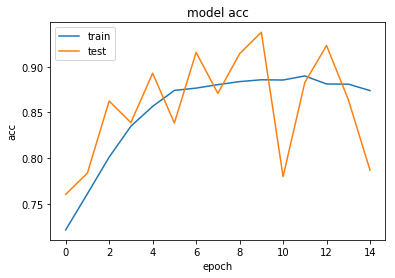

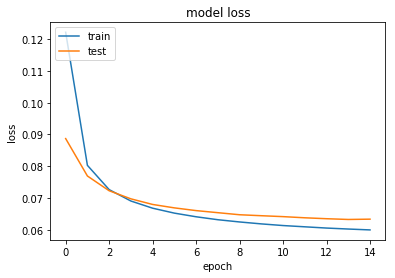

In [26]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
# x_train = train[COMMENT].values
# x_test = test[COMMENT].values

In [16]:
MAX_TOKENS = 30000
MAX_SENTENSE_LEN = 100
EMBEDDING_SIZE_1 = all_embs_1.shape[1]
EMBEDDING_SIZE_2 = all_embs_2.shape[1]
EMBEDDING_SIZE = EMBEDDING_SIZE_1 + EMBEDDING_SIZE_2

In [17]:
x_train = train["comment_text"].values
y_train = train[LABELS].values
x_test = test["comment_text"].values

tokenizer = text.Tokenizer(num_words=MAX_TOKENS)
tokenizer.fit_on_texts(list(x_train) + list(x_test)) # is it a proper trick?

x_train, x_test = map(tokenizer.texts_to_sequences, [x_train, x_test])
x_train, x_test = map(lambda x: sequence.pad_sequences(x, maxlen=MAX_SENTENSE_LEN), [x_train, x_test])


In [18]:
word_index = tokenizer.word_index
nb_words = min(MAX_TOKENS, len(word_index))
embedding_matrix_1 = np.random.normal(emb_mean_1, emb_std_1, (nb_words, EMBEDDING_SIZE_1))
embedding_matrix_2 = np.random.normal(emb_mean_2, emb_std_2, (nb_words, EMBEDDING_SIZE_2))
for word, i in word_index.items():
    if i >= MAX_TOKENS: continue

    embedding_vector_1 = embeddings_index_1.get(word)
    if embedding_vector_1 is not None: 
        embedding_matrix_1[i] = embedding_vector_1
        
    embedding_vector_2 = embeddings_index_2.get(word)
    if embedding_vector_2 is not None: 
        embedding_matrix_2[i] = embedding_vector_2

In [19]:
embedding_matrix_1.shape

(30000, 300)

In [20]:
embedding_matrix_2.shape

(30000, 300)

In [21]:
embedding_matrix = np.concatenate((embedding_matrix_1, embedding_matrix_2), axis=1)
embedding_matrix.shape

(30000, 600)

# Data understanding & visualization

# De-noise (no drop data)

# Feature engineering

# Offline augmentation

# Standarization

# Scaling

# Normalization

# Feature selection

# Data selection

# Optimization

In [ ]:
model_input = keras.Input(shape=(MAX_SENTENSE_LEN, ))
x = keras.layers.Embedding(MAX_TOKENS, EMBEDDING_SIZE, mask_zero=True, weights=[embedding_matrix], embeddings_regularizer=l2(1e-5))(model_input)
x = keras.layers.GRU(64, return_sequences=True, activation="relu", kernel_regularizer=l2(1e-5))(x)
x = keras.layers.SpatialDropout1D(0.2)(x)
x = keras.layers.GRU(32, return_sequences=False, activation="relu", kernel_regularizer=l2(1e-5))(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(32, activation="relu")(x)
model_output = keras.layers.Dense(len(LABELS), activation="sigmoid")(x)

model = keras.Model(inputs=model_input, outputs=model_output)
model.compile(keras.optimizers.Adam(3e-4), loss='binary_crossentropy', metrics=['acc'])

hist = model.fit(x_train, 
                 y_train, 
                 batch_size=256,
                 shuffle=True,
                 epochs=100, 
                 validation_split=0.05,
                 callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                          patience=1, 
                                                          verbose=1)], 
                 verbose=1)

y_pred = model.predict(x_test)
submission[LABELS] = y_pred
submission.to_csv('121.submission.csv', index=False)

# ~ 0.96507

In [ ]:
model_input = keras.Input(shape=(MAX_SENTENSE_LEN, ))
x = keras.layers.Embedding(MAX_TOKENS, EMBEDDING_SIZE, mask_zero=True, weights=[embedding_matrix], embeddings_regularizer=l2(1e-5))(model_input)
x = keras.layers.Bidirectional(keras.layers.GRU(64, return_sequences=True, activation="relu", recurrent_dropout=0.1))(x)
x = keras.layers.SpatialDropout1D(0.2)(x)
x = keras.layers.Bidirectional(keras.layers.GRU(32, return_sequences=True, activation="relu", recurrent_dropout=0.1))(x)
x = keras.layers.GlobalMaxPool1D()(x)
x = keras.layers.Dense(32, activation="relu")(x)
model_output = keras.layers.Dense(len(LABELS), activation="sigmoid")(x)

model = keras.Model(inputs=model_input, outputs=model_output)
model.compile(keras.optimizers.Adam(3e-4), loss='binary_crossentropy', metrics=['acc'])

hist = model.fit(x_train, 
                 y_train, 
                 batch_size=256,
                 shuffle=True,
                 epochs=100, 
                 validation_split=0.05,
                 callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                          patience=1, 
                                                          verbose=1)], 
                 verbose=1)

y_pred = model.predict(x_test)
submission[LABELS] = y_pred
submission.to_csv('122.submission.csv', index=False)

# ~ 0.97371

In [ ]:
model_input = keras.Input(shape=(MAX_SENTENSE_LEN, ))
x = keras.layers.Embedding(MAX_TOKENS, EMBEDDING_SIZE, weights=[embedding_matrix])(model_input)
x = keras.layers.Bidirectional(keras.layers.GRU(64, return_sequences=True, activation="relu", recurrent_dropout=0.1))(x)
x = keras.layers.SpatialDropout1D(0.1)(x)
x = keras.layers.Bidirectional(keras.layers.GRU(32, return_sequences=True, activation="relu", recurrent_dropout=0.1))(x)
x = keras.layers.GlobalMaxPool1D()(x)
x = keras.layers.Dense(32, activation="relu")(x)
model_output = keras.layers.Dense(len(LABELS), activation="sigmoid")(x)

model = keras.Model(inputs=model_input, outputs=model_output)
model.compile(keras.optimizers.Adam(3e-4), loss='binary_crossentropy', metrics=['acc'])

hist = model.fit(x_train, 
                 y_train, 
                 batch_size=256,
                 shuffle=True,
                 epochs=100, 
                 validation_split=0.05,
                 callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                          patience=1, 
                                                          verbose=1)], 
                 verbose=1)

y_pred = model.predict(x_test)
submission[LABELS] = y_pred
submission.to_csv('123.submission.csv', index=False)

# ~ 0.98018

Epoch 1/100
593/593 [==============================] - 879s 1s/step - loss: 0.1012 - acc: 0.8568 - val_loss: 0.0530 - val_acc: 0.9940
Epoch 2/100
593/593 [==============================] - 926s 2s/step - loss: 0.0485 - acc: 0.9878 - val_loss: 0.0509 - val_acc: 0.9922
Epoch 3/100
115/593 [====>.........................] - ETA: 12:38 - loss: 0.0437 - acc: 0.9908

In [ ]:
model_input = keras.Input(shape=(MAX_SENTENSE_LEN, ))
x = keras.layers.Embedding(MAX_TOKENS, EMBEDDING_SIZE, weights=[embedding_matrix])(model_input)
x = keras.layers.Bidirectional(keras.layers.GRU(64, return_sequences=True, activation="relu", recurrent_dropout=0.1))(x)
x = keras.layers.SpatialDropout1D(0.1)(x)
x = keras.layers.Bidirectional(keras.layers.GRU(32, return_sequences=True, activation="relu", recurrent_dropout=0.1))(x)
x = keras.layers.GlobalMaxPool1D()(x)
x = keras.layers.Dense(32, activation="relu")(x)
model_output = keras.layers.Dense(len(LABELS), activation="sigmoid")(x)

model = keras.Model(inputs=model_input, outputs=model_output)
model.compile(keras.optimizers.Adam(3e-4), loss='binary_crossentropy', metrics=['acc'])

hist = model.fit(x_train, 
                 y_train, 
                 batch_size=32,
                 shuffle=True,
                 epochs=100, 
                 validation_split=0.05,
                 callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                          patience=1, 
                                                          verbose=1)], 
                 verbose=1)

y_pred = model.predict(x_test)
submission[LABELS] = y_pred
submission.to_csv('124.submission.csv', index=False)

# ~ 0.98002

In [ ]:
model_input = keras.Input(shape=(MAX_SENTENSE_LEN,))
x = keras.layers.Embedding(MAX_TOKENS, EMBEDDING_SIZE, weights=[embedding_matrix])(model_input)
x = keras.layers.Bidirectional(keras.layers.LSTM(50, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
x = keras.layers.GlobalMaxPool1D()(x)
x = keras.layers.Dense(50, activation="relu")(x)
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.Dense(6, activation="sigmoid")(x)
model = keras.Model(inputs=model_input, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(x_train, 
                 y_train, 
                 batch_size=256,
                 shuffle=True,
                 epochs=100, 
                 validation_split=0.05,
                 callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                          patience=1, 
                                                          verbose=1)], 
                 verbose=1)

y_pred = model.predict(x_test)
submission[LABELS] = y_pred
submission.to_csv('125.submission.csv', index=False)

# ~ 0.97787

In [ ]:
model_input = keras.Input(shape=(MAX_SENTENSE_LEN,))
x = keras.layers.Embedding(MAX_TOKENS, EMBEDDING_SIZE, weights=[embedding_matrix])(model_input)
x = keras.layers.Bidirectional(keras.layers.LSTM(50, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
x = keras.layers.GlobalMaxPool1D()(x)
x = keras.layers.Dense(50, activation="relu")(x)
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.Dense(6, activation="sigmoid")(x)
model = keras.Model(inputs=model_input, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.1);

y_pred = model.predict(x_test)
submission[LABELS] = y_pred
submission.to_csv('126.submission.csv', index=False)
# ~ 0.98071

# Parameter tuning

# Online augmentation

# Model selection / blending

# Post-processing

# Evaluation

# Reasoning

# Monitoring